In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("telecom_customer_churn.csv")

In [3]:
df_pop = pd.read_csv("telecom_zipcode_population.csv")

In [4]:
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  Tenure in Months  \
0     93225  34.827662 -118.999073                    2                 9   
1     91206  34.162515 -118.203869                    0                 9   
2     92627  33.645672 -117.922613                    0                 4   
3     94553  38.014457 -122.115432                    1                13   
4     93010  34.227846 -119.079903                    3                 3   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0     None           Yes                              42.39             No   
1     None           Yes                              10.69            Yes   
2  Offer E           Yes                              33.65             No   
3  Offer D           Yes                              27.82             No   
4     None           Yes                               7.38             No   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes         Cable                     16.0              No   
1              Yes         Cable                     10.0              No   
2              Yes   Fiber Optic                     30.0              No   
3              Yes   Fiber Optic                      4.0              No   
4              Yes   Fiber Optic                     11.0              No   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0           Yes                     No                  Yes          Yes   
1            No                     No                   No           No   
2            No                    Yes                   No           No   
3           Yes                    Yes                   No          Yes   
4            No                     No                  Yes          Yes   

  Streaming Movies Streaming Music Unlimited Data        Contract  \
0               No              No            Yes        One Year   
1              Yes             Yes             No  Month-to-Month   
2               No              No            Yes  Month-to-Month   
3              Yes              No            Yes  Month-to-Month   
4               No              No            Yes  Month-to-Month   

  Paperless Billing   Payment Method  Monthly Charge  Total Charges  \
0               Yes      Credit Card            65.6         593.30   
1                No      Credit Card            -4.0         542.40   
2               Yes  Bank Withdrawal            73.9         280.85   
3               Yes  Bank Withdrawal            98.0        1237.85   
4               Yes      Credit Card            83.9         267.40   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   Total Revenue Customer Status   Churn Category  \
0         974.81          Stayed              NaN   
1         610.28          Stayed              NaN   
2         415.45         Churned       Competitor   
3        1599.51         Churned  Dissatisfaction   
4         289.54         Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                      

In [5]:
df.drop(['Customer ID', 'Latitude', 'Longitude'], inplace = True, axis = 1)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Number of Referrals                7043 non-null   int64  
 7   Tenure in Months                   7043 non-null   int64  
 8   Offer                              7043 non-null   object 
 9   Phone Service                      7043 non-null   object 
 10  Avg Monthly Long Distance Charges  6361 non-null   float64
 11  Multiple Lines                     6361 non-null   objec

In [7]:
df.head()

Gender  Age Married  Number of Dependents          City  Zip Code  \
0  Female   37     Yes                     0  Frazier Park     93225   
1    Male   46      No                     0      Glendale     91206   
2    Male   50      No                     0    Costa Mesa     92627   
3    Male   78     Yes                     0      Martinez     94553   
4  Female   75     Yes                     0     Camarillo     93010   

   Number of Referrals  Tenure in Months    Offer Phone Service  \
0                    2                 9     None           Yes   
1                    0                 9     None           Yes   
2                    0                 4  Offer E           Yes   
3                    1                13  Offer D           Yes   
4                    3                 3     None           Yes   

   Avg Monthly Long Distance Charges Multiple Lines Internet Service  \
0                              42.39             No              Yes   
1                              10.69            Yes              Yes   
2                              33.65             No              Yes   
3                              27.82             No              Yes   
4                               7.38             No              Yes   

  Internet Type  Avg Monthly GB Download Online Security Online Backup  \
0         Cable                     16.0              No           Yes   
1         Cable                     10.0              No            No   
2   Fiber Optic                     30.0              No            No   
3   Fiber Optic                      4.0              No           Yes   
4   Fiber Optic                     11.0              No            No   

  Device Protection Plan Premium Tech Support Streaming TV Streaming Movies  \
0                     No                  Yes          Yes               No   
1                     No                   No           No              Yes   
2                    Yes                   No           No               No   
3                    Yes                   No          Yes              Yes   
4                     No                  Yes          Yes               No   

  Streaming Music Unlimited Data        Contract Paperless Billing  \
0              No            Yes        One Year               Yes   
1             Yes             No  Month-to-Month                No   
2              No            Yes  Month-to-Month               Yes   
3              No            Yes  Month-to-Month               Yes   
4              No            Yes  Month-to-Month               Yes   

    Payment Method  Monthly Charge  Total Charges  Total Refunds  \
0      Credit Card            65.6         593.30           0.00   
1      Credit Card            -4.0         542.40          38.33   
2  Bank Withdrawal            73.9         280.85           0.00   
3  Bank Withdrawal            98.0        1237.85           0.00   
4      Credit Card            83.9         267.40           0.00   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                         0                       381.51         974.81   
1                        10                        96.21         610.28   
2                         0                       134.60         415.45   
3                         0                       361.66        1599.51   
4                         0                        22.14         289.54   

  Customer Status   Churn Category                   Churn Reason  
0          Stayed              NaN                            NaN  
1          Stayed              NaN                            NaN  
2         Churned       Competitor  Competitor had better devices  
3         Churned  Dissatisfaction        Product dissatisfaction  
4         Churned  Dissatisfaction            Network reliability

In [8]:
df_pop.head()

Zip Code  Population
0     90001       54492
1     90002       44586
2     90003       58198
3     90004       67852
4     90005       43019

In [9]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Zip Code    1671 non-null   int64
 1   Population  1671 non-null   int64
dtypes: int64(2)
memory usage: 26.2 KB


In [10]:
final_df = df.merge(df_pop, on='Zip Code', how='inner')

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Number of Referrals                7043 non-null   int64  
 7   Tenure in Months                   7043 non-null   int64  
 8   Offer                              7043 non-null   object 
 9   Phone Service                      7043 non-null   object 
 10  Avg Monthly Long Distance Charges  6361 non-null   float64
 11  Multiple Lines                     6361 non-null   objec

In [12]:
cat_cols = final_df.select_dtypes(include='object').columns
num_cols = final_df.select_dtypes(include=np.number).columns

In [13]:
for col in cat_cols:
    final_df[col] = final_df[col].astype('category')

In [14]:
print(num_cols)

Index(['Age', 'Number of Dependents', 'Zip Code', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Population'],
      dtype='object')


In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             7043 non-null   category
 1   Age                                7043 non-null   int64   
 2   Married                            7043 non-null   category
 3   Number of Dependents               7043 non-null   int64   
 4   City                               7043 non-null   category
 5   Zip Code                           7043 non-null   int64   
 6   Number of Referrals                7043 non-null   int64   
 7   Tenure in Months                   7043 non-null   int64   
 8   Offer                              7043 non-null   category
 9   Phone Service                      7043 non-null   category
 10  Avg Monthly Long Distance Charges  6361 non-null   float64 
 11  Multiple Lines                     6361 non

In [16]:
list_var_cat = final_df.columns[final_df.isna().any()].tolist()
list_var_num = [list_var_cat.pop(0)]
list_var_num.append(list_var_cat.pop(2))

print(list_var_cat)

['Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Churn Category', 'Churn Reason']


In [17]:
list_var_num

['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']

In [18]:
print(final_df[cat_cols].isnull().sum().sort_values(ascending=False))

Churn Reason              5174
Churn Category            5174
Online Backup             1526
Unlimited Data            1526
Streaming Music           1526
Streaming Movies          1526
Streaming TV              1526
Device Protection Plan    1526
Premium Tech Support      1526
Online Security           1526
Internet Type             1526
Multiple Lines             682
Married                      0
Internet Service             0
Phone Service                0
Offer                        0
Contract                     0
Paperless Billing            0
Payment Method               0
Customer Status              0
City                         0
Gender                       0
dtype: int64


In [19]:
final_df[num_cols].isnull().sum().sort_values(ascending=False)

Avg Monthly GB Download              1526
Avg Monthly Long Distance Charges     682
Age                                     0
Number of Dependents                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Monthly Charge                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
Total Revenue                           0
Population                              0
dtype: int64

In [20]:
final_df.shape #7088 columns 36 rows 

(7043, 36)

In [21]:
final_df['Total Refunds']

0        0.00
1       43.25
2        0.00
3        0.00
4       38.33
        ...  
7038    32.09
7039     0.00
7040     0.00
7041     0.00
7042     0.00
Name: Total Refunds, Length: 7043, dtype: float64

<AxesSubplot:xlabel='Total Refunds', ylabel='Count'>

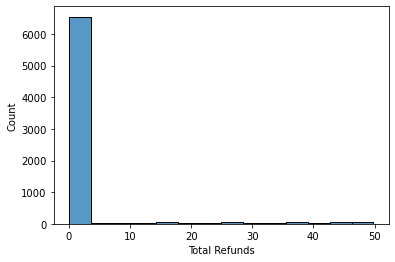

In [22]:
sns.histplot(final_df['Total Refunds'])

In [23]:
num = 10
for col in cat_cols:
    print(col)
    val_counts = final_df[col].value_counts(dropna=False)
    print(val_counts[:num])
    if(len(val_counts) > num):
        print("Unique values more than 10")
    print("\n\n")

Gender
Male      3555
Female    3488
Name: Gender, dtype: int64



Married
No     3641
Yes    3402
Name: Married, dtype: int64



City
Los Angeles      293
San Diego        285
San Jose         112
Sacramento       108
San Francisco    104
Fresno            61
Long Beach        60
Oakland           52
Escondido         51
Stockton          44
Name: City, dtype: int64
Unique values more than 10



Offer
None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64



Phone Service
Yes    6361
No      682
Name: Phone Service, dtype: int64



Multiple Lines
No     3390
Yes    2971
NaN     682
Name: Multiple Lines, dtype: int64



Internet Service
Yes    5517
No     1526
Name: Internet Service, dtype: int64



Internet Type
Fiber Optic    3035
DSL            1652
NaN            1526
Cable           830
Name: Internet Type, dtype: int64



Online Security
No     3498
Yes    2019
NaN    1526
Name: Online Security, dtype: int64



On

In [24]:
final_df['Customer Status'] = final_df['Customer Status'].apply(lambda x: "Stayed" if x == 'Joined' else x)

In [25]:
final_df

Gender  Age Married  Number of Dependents           City  Zip Code  \
0     Female   37     Yes                     0   Frazier Park     93225   
1       Male   32      No                     0   Frazier Park     93225   
2     Female   72     Yes                     0   Frazier Park     93225   
3       Male   46      No                     0   Frazier Park     93225   
4       Male   46      No                     0       Glendale     91206   
...      ...  ...     ...                   ...            ...       ...   
7038  Female   64      No                     0    Carpinteria     93013   
7039    Male   76      No                     0  Meadow Valley     95956   
7040    Male   22      No                     0  Meadow Valley     95956   
7041    Male   39      No                     0  Meadow Valley     95956   
7042  Female   56     Yes                     1  Meadow Valley     95956   

      Number of Referrals  Tenure in Months    Offer Phone Service  \
0                       2                 9     None           Yes   
1                       0                10  Offer D           Yes   
2                       8                58  Offer B           Yes   
3                       0                59     None           Yes   
4                       0                 9     None           Yes   
...                   ...               ...      ...           ...   
7038                    0                15     None           Yes   
7039                    0                39     None           Yes   
7040                    0                10     None           Yes   
7041                    0                38     None           Yes   
7042                    2                67  Offer A           Yes   

      Avg Monthly Long Distance Charges Multiple Lines Internet Service  \
0                                 42.39             No              Yes   
1                                 45.69             No              Yes   
2                                 47.34            Yes              Yes   
3                                  9.70             No              Yes   
4                                 10.69            Yes              Yes   
...                                 ...            ...              ...   
7038                              13.58            Yes              Yes   
7039                              20.06            Yes              Yes   
7040                              17.98            Yes              Yes   
7041                              33.71             No              Yes   
7042                              48.75             No               No   

     Internet Type  Avg Monthly GB Download Online Security Online Backup  \
0            Cable                     16.0              No           Yes   
1      Fiber Optic                     11.0              No            No   
2      Fiber Optic                     28.0              No            No   
3              DSL                      6.0              No            No   
4            Cable                     10.0              No            No   
...            ...                      ...             ...           ...   
7038           DSL                     19.0              No            No   
7039   Fiber Optic                      3.0              No           Yes   
7040   Fiber Optic                     26.0              No            No   
7041   Fiber Optic                     17.0              No            No   
7042           NaN                      NaN             NaN           NaN   

     Device Protection Plan Premium Tech Support Streaming TV  \
0                        No                  Yes          Yes   
1                        No                  Yes          Yes   
2                        No                  Yes          Yes   
3                       Yes                   No           No   
4                        No                   No           No   
...                     ...         

In [26]:
for cols in list_var_cat:
    final_df[cols] = final_df[cols].astype(str).replace('nan', 'is_missing').astype('category')
for cols in list_var_num:
    final_df[cols] = final_df[cols].fillna(final_df[cols].mode()[0])


In [27]:
print(list_var_num)

['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']


In [28]:
final_df['Total Refunds'] 

0        0.00
1       43.25
2        0.00
3        0.00
4       38.33
        ...  
7038    32.09
7039     0.00
7040     0.00
7041     0.00
7042     0.00
Name: Total Refunds, Length: 7043, dtype: float64

In [29]:
final_df.isnull().sum().sort_values(ascending=False)

Gender                               0
Age                                  0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue                        0
Customer Status                      0
Churn Category                       0
Churn Reason                         0
Streaming TV                         0
Premium Tech Support                 0
Device Protection Plan               0
Offer                                0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Number of Referrals      

In [30]:
final_df

Gender  Age Married  Number of Dependents           City  Zip Code  \
0     Female   37     Yes                     0   Frazier Park     93225   
1       Male   32      No                     0   Frazier Park     93225   
2     Female   72     Yes                     0   Frazier Park     93225   
3       Male   46      No                     0   Frazier Park     93225   
4       Male   46      No                     0       Glendale     91206   
...      ...  ...     ...                   ...            ...       ...   
7038  Female   64      No                     0    Carpinteria     93013   
7039    Male   76      No                     0  Meadow Valley     95956   
7040    Male   22      No                     0  Meadow Valley     95956   
7041    Male   39      No                     0  Meadow Valley     95956   
7042  Female   56     Yes                     1  Meadow Valley     95956   

      Number of Referrals  Tenure in Months    Offer Phone Service  \
0                       2                 9     None           Yes   
1                       0                10  Offer D           Yes   
2                       8                58  Offer B           Yes   
3                       0                59     None           Yes   
4                       0                 9     None           Yes   
...                   ...               ...      ...           ...   
7038                    0                15     None           Yes   
7039                    0                39     None           Yes   
7040                    0                10     None           Yes   
7041                    0                38     None           Yes   
7042                    2                67  Offer A           Yes   

      Avg Monthly Long Distance Charges Multiple Lines Internet Service  \
0                                 42.39             No              Yes   
1                                 45.69             No              Yes   
2                                 47.34            Yes              Yes   
3                                  9.70             No              Yes   
4                                 10.69            Yes              Yes   
...                                 ...            ...              ...   
7038                              13.58            Yes              Yes   
7039                              20.06            Yes              Yes   
7040                              17.98            Yes              Yes   
7041                              33.71             No              Yes   
7042                              48.75             No               No   

     Internet Type  Avg Monthly GB Download Online Security Online Backup  \
0            Cable                     16.0              No           Yes   
1      Fiber Optic                     11.0              No            No   
2      Fiber Optic                     28.0              No            No   
3              DSL                      6.0              No            No   
4            Cable                     10.0              No            No   
...            ...                      ...             ...           ...   
7038           DSL                     19.0              No            No   
7039   Fiber Optic                      3.0              No           Yes   
7040   Fiber Optic                     26.0              No            No   
7041   Fiber Optic                     17.0              No            No   
7042    is_missing                     19.0      is_missing    is_missing   

     Device Protection Plan Premium Tech Support Streaming TV  \
0                        No                  Yes          Yes   
1                        No                  Yes          Yes   
2                        No                  Yes          Yes   
3                       Yes                   No           No   
4                        No                   No           No   
...                     ...         

In [31]:
final_df.describe().T

count          mean           std  \
Age                                7043.0     46.509726     16.750352   
Number of Dependents               7043.0      0.468692      0.962802   
Zip Code                           7043.0  93486.070567   1856.767505   
Number of Referrals                7043.0      1.951867      3.001199   
Tenure in Months                   7043.0     32.386767     24.542061   
Avg Monthly Long Distance Charges  7043.0     24.727138     13.660383   
Avg Monthly GB Download            7043.0     24.632117     17.586246   
Monthly Charge                     7043.0     63.596131     31.204743   
Total Charges                      7043.0   2280.381264   2266.220462   
Total Refunds                      7043.0      1.962182      7.902614   
Total Extra Data Charges           7043.0      6.860713     25.104978   
Total Long Distance Charges        7043.0    749.099262    846.660055   
Total Revenue                      7043.0   3034.379056   2865.204542   
Population                         7043.0  22139.603294  21152.392837   

                                        min        25%       50%        75%  \
Age                                   19.00     32.000     46.00     60.000   
Number of Dependents                   0.00      0.000      0.00      0.000   
Zip Code                           90001.00  92101.000  93518.00  95329.000   
Number of Referrals                    0.00      0.000      0.00      3.000   
Tenure in Months                       1.00      9.000     29.00     55.000   
Avg Monthly Long Distance Charges      1.01     14.455     22.89     36.395   
Avg Monthly GB Download                2.00     15.000     19.00     27.000   
Monthly Charge                       -10.00     30.400     70.05     89.750   
Total Charges                         18.80    400.150   1394.55   3786.600   
Total Refunds                          0.00      0.000      0.00      0.000   
Total Extra Data Charges               0.00      0.000      0.00      0.000   
Total Long Distance Charges            0.00     70.545    401.44   1191.100   
Total Revenue                         21.36    605.610   2108.64   4801.145   
Population                            11.00   2344.000  17554.00  36125.000   

                                         max  
Age                                    80.00  
Number of Dependents                    9.00  
Zip Code                            96150.00  
Number of Referrals                    11.00  
Tenure in Months                       72.00  
Avg Monthly Long Distance Charges      49.99  
Avg Monthly GB Download                85.00  
Monthly Charge                        118.75  
Total Charges                        8684.80  
Total Refunds                          49.79  
Total Extra Data Charges              150.00  
Total Long Distance Charges          3564.72  
Total Revenue                       11979.34  
Population                         105285.00

In [32]:
def histogram_boxplot(feature):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    """   
    figure, (ax_box2, ax_hist2, ax_hist3) = plt.subplots(
        nrows = 1, ncols=3,# Number of rows of the subplot grid= 2
        figsize  = (20,5)) # creating the 2 subplots
    figure.tight_layout(pad = 7)
    sns.boxplot(x = feature,ax=ax_box2, color = '#4B8BBE', orient = 'v') # boxplot will be created 
    sns.distplot(feature, kde=True, ax=ax_hist2, color = '#a9a38f') # For histogram
    sns.distplot(feature, kde= True, ax=ax_hist3, hist = False) #Making an outline of the histogram 
    ax_hist2.axvline(np.mean(feature), color='r', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    ax_hist3.axvline(np.mean(feature), color = 'black', linestyle = '--') #Adding mean to second histogram
    ax_hist3.axvline(np.median(feature), color='black', linestyle='-') #Adding median to second histogram

Age
Number of Dependents
Zip Code
Number of Referrals
Tenure in Months
Avg Monthly Long Distance Charges
Avg Monthly GB Download
Monthly Charge
Total Charges
Total Refunds
Total Extra Data Charges
Total Long Distance Charges
Total Revenue
Population


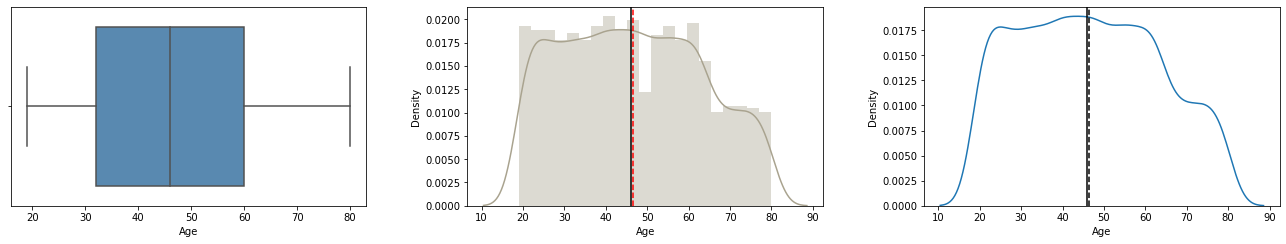

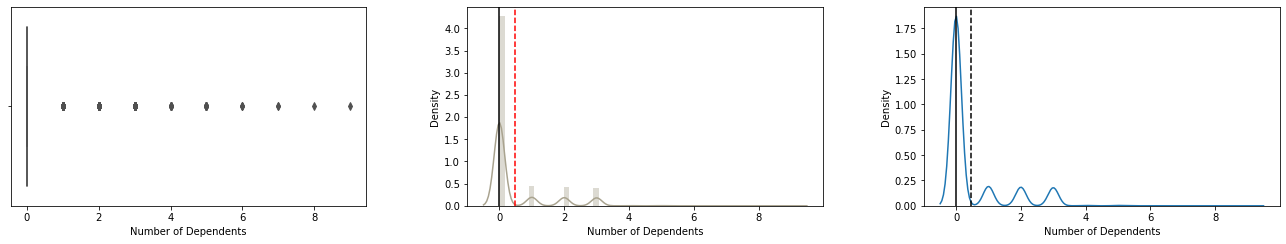

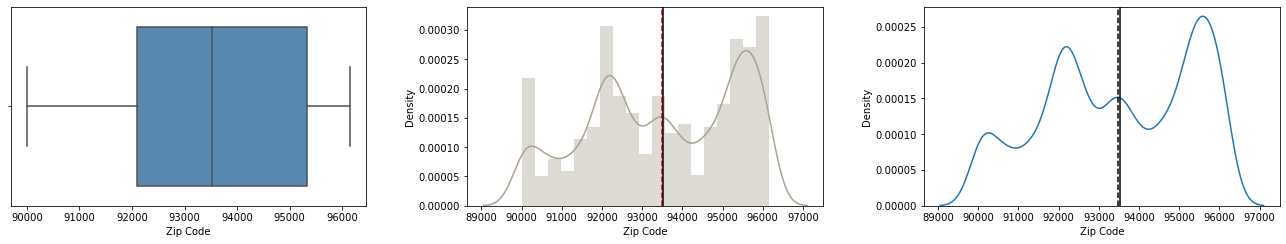

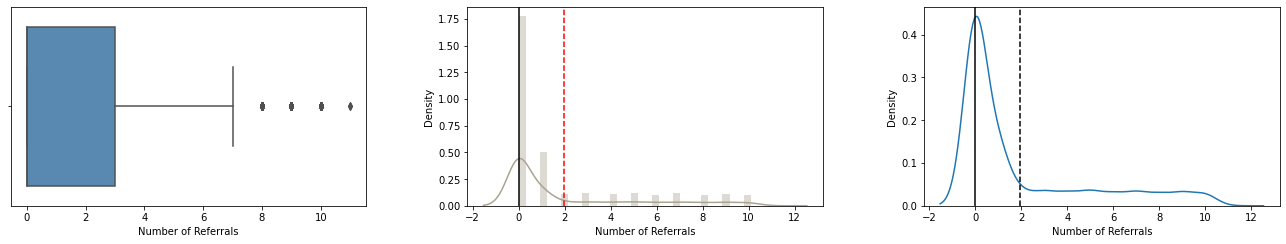

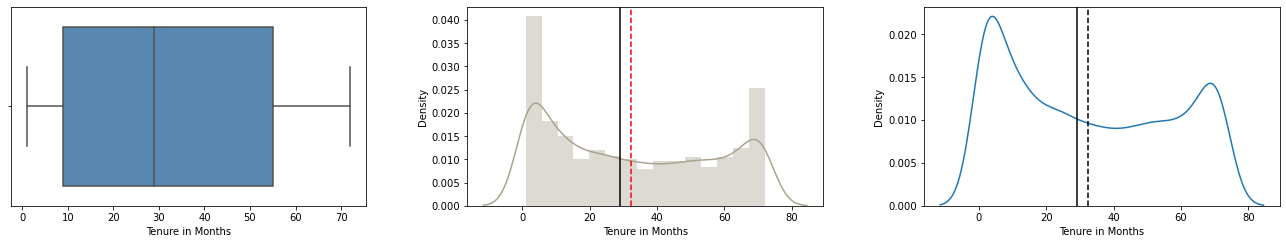

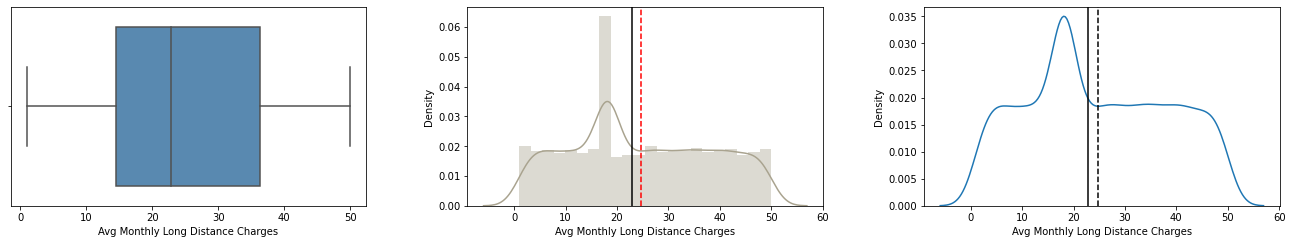

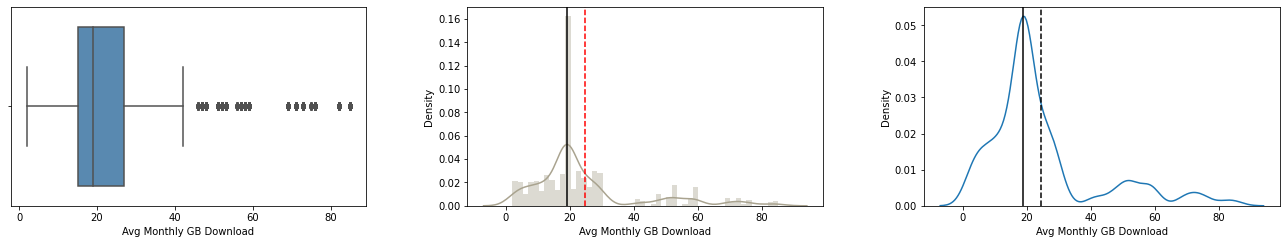

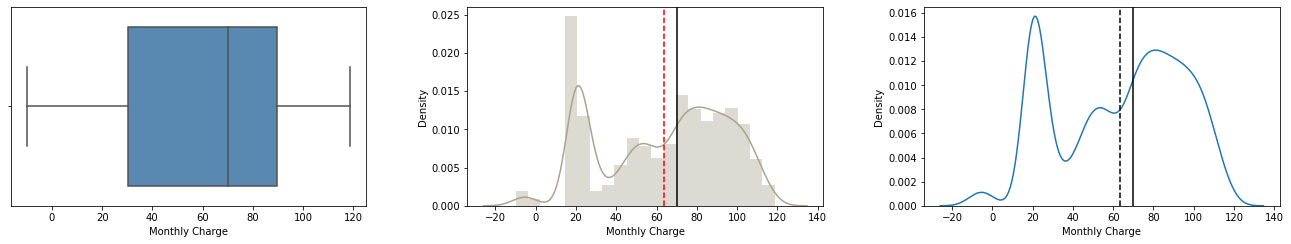

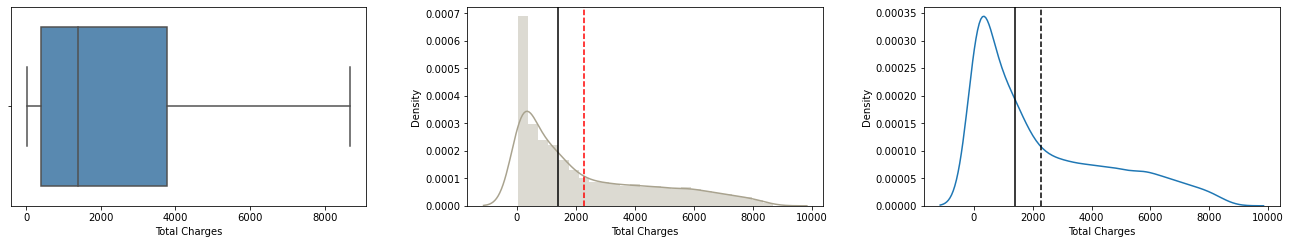

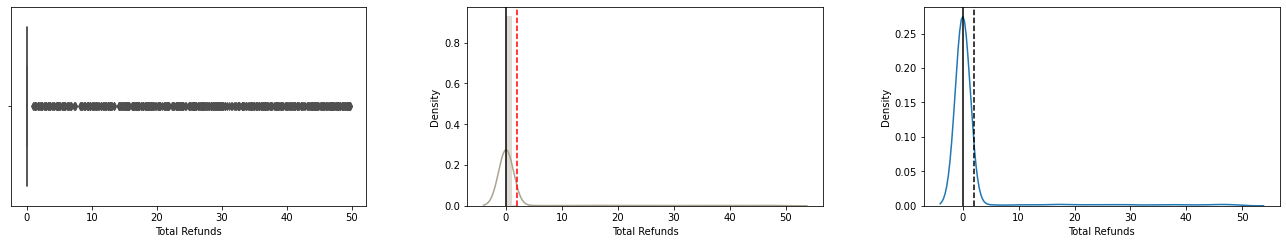

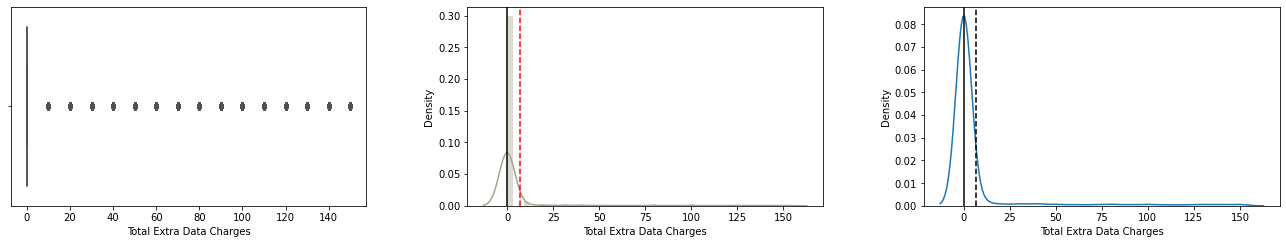

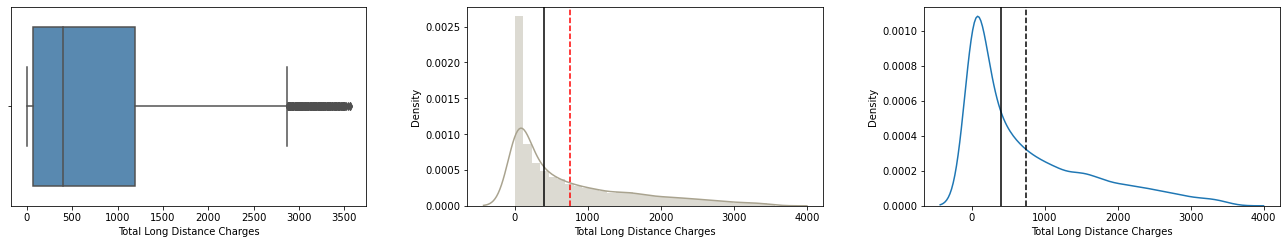

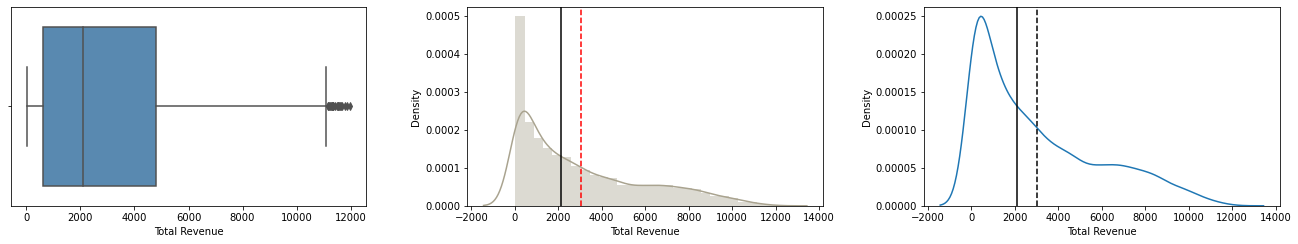

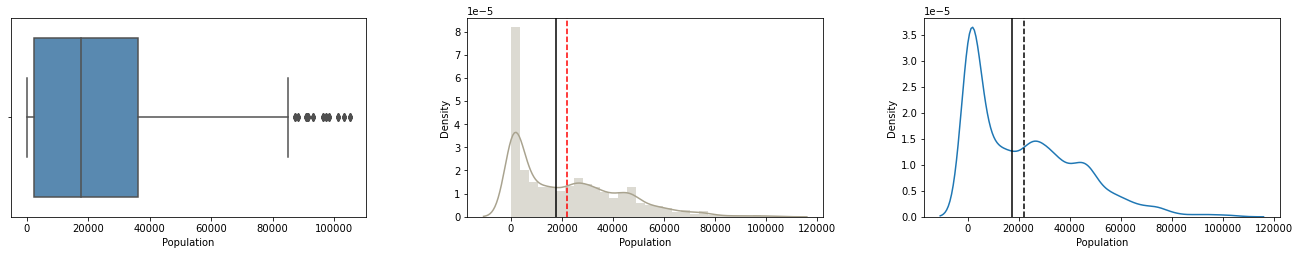

In [33]:
for i in num_cols:
    histogram_boxplot(final_df[i])

In [34]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [35]:
#final_df = treat_outliers_all(final_df, num_cols)

In [36]:
# plt.figure(figsize=(20, 30))

# for i, variable in enumerate(num_cols): #boxplots subplots 
#     plt.subplot(5, 4, i + 1)
#     plt.boxplot(final_df[variable], whis=1.5)
#     plt.tight_layout()
#     plt.title(variable)

# plt.show()

In [37]:
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

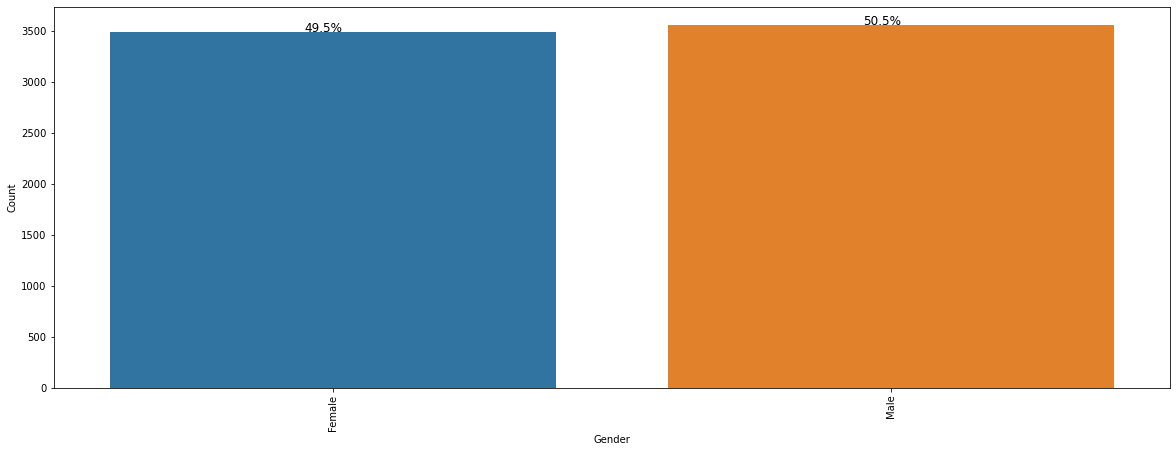

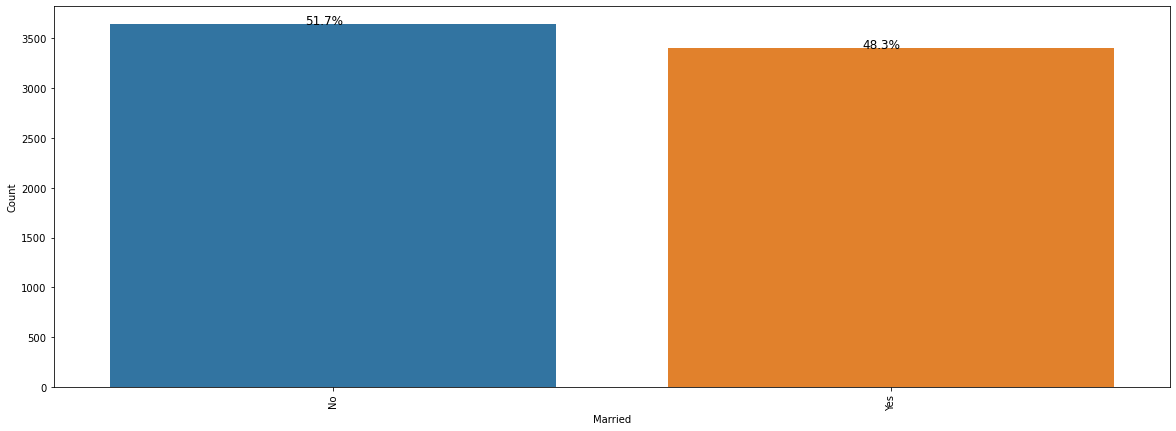

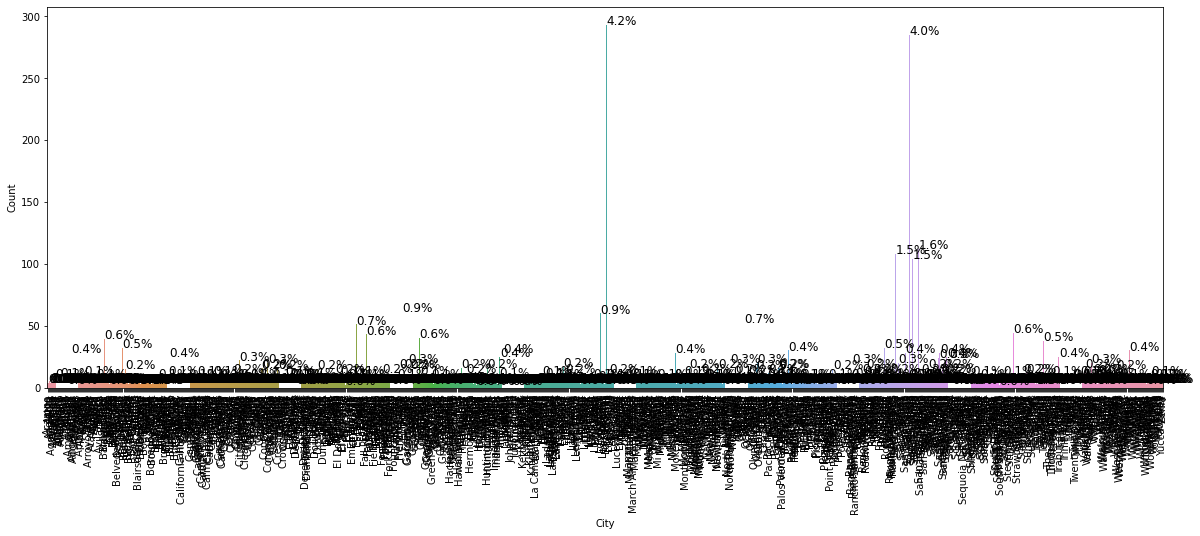

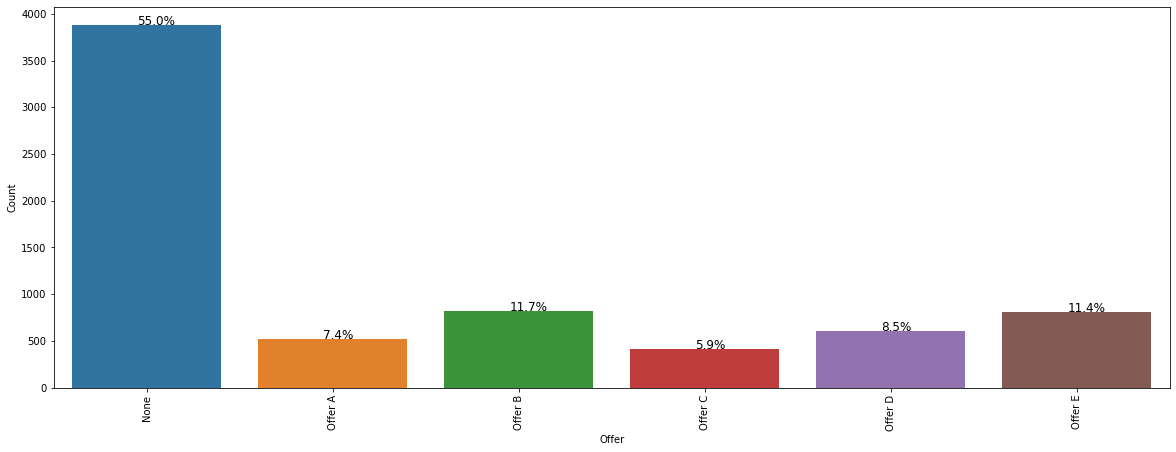

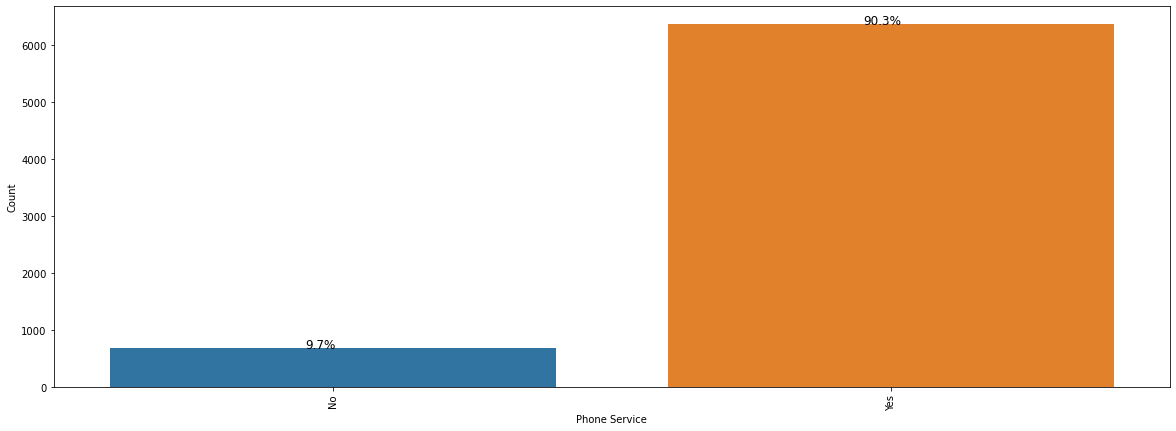

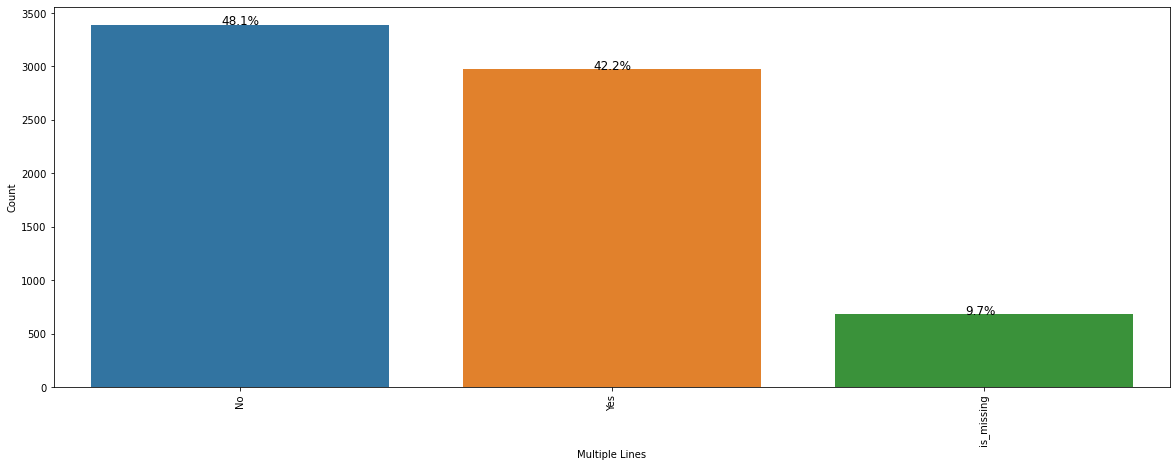

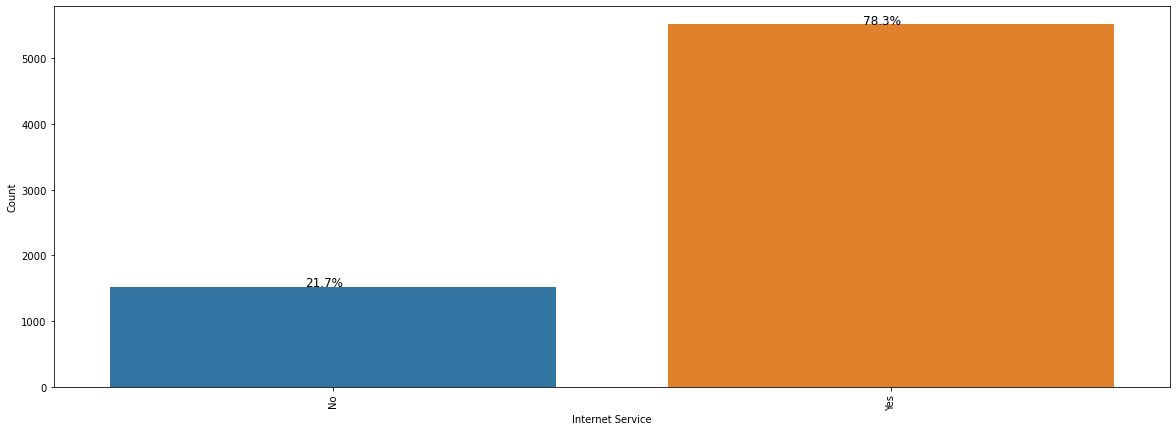

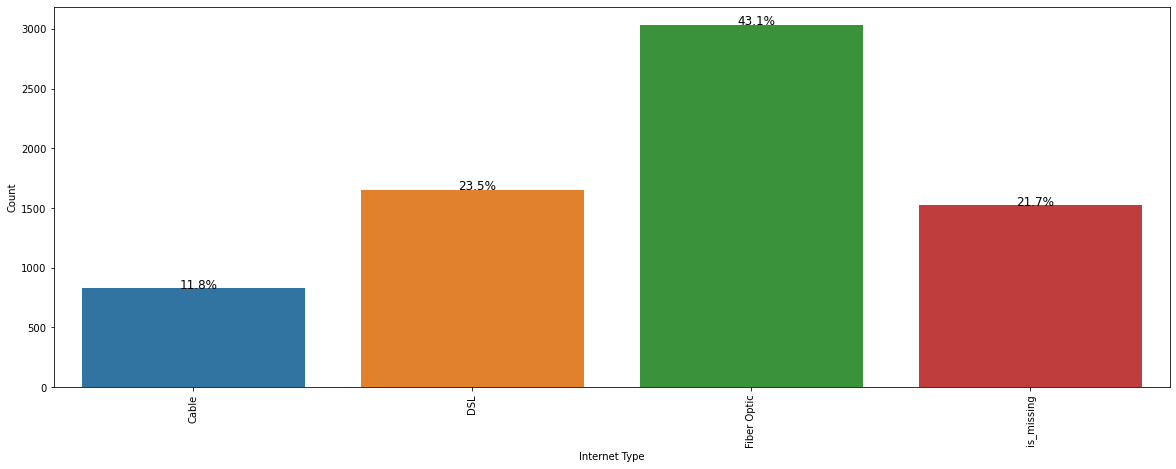

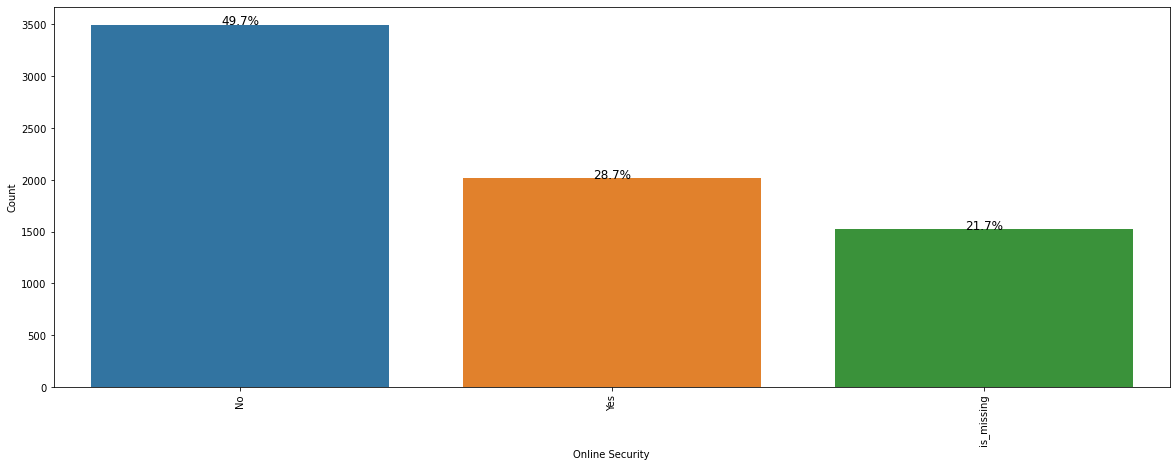

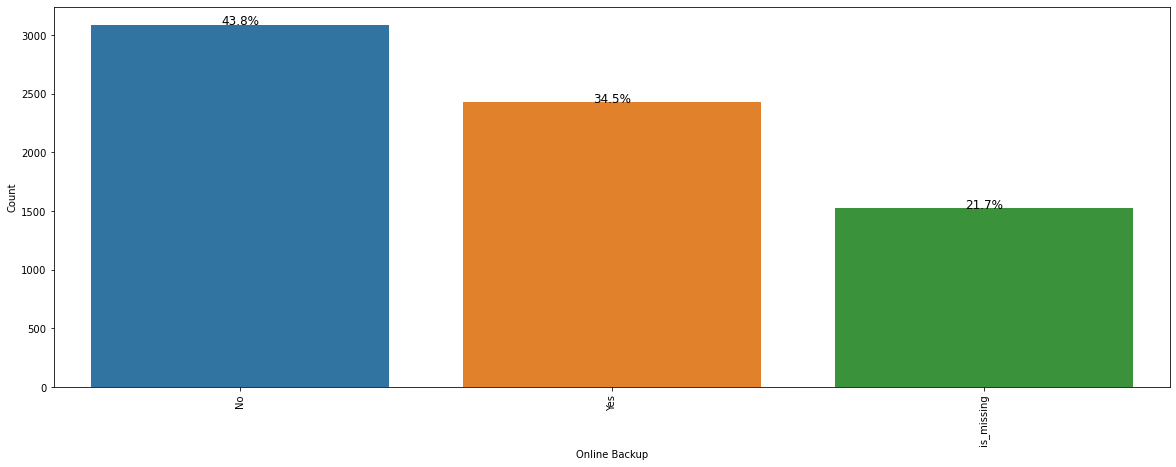

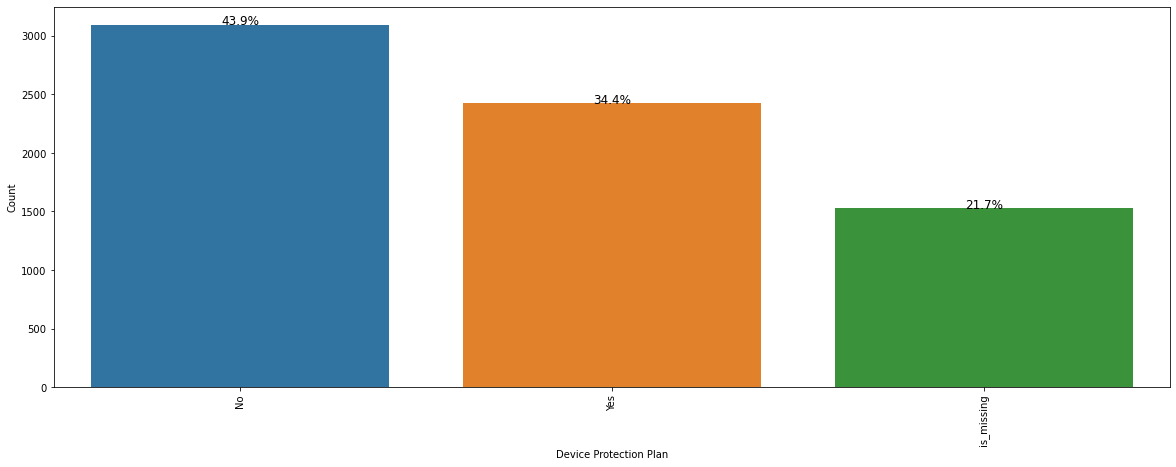

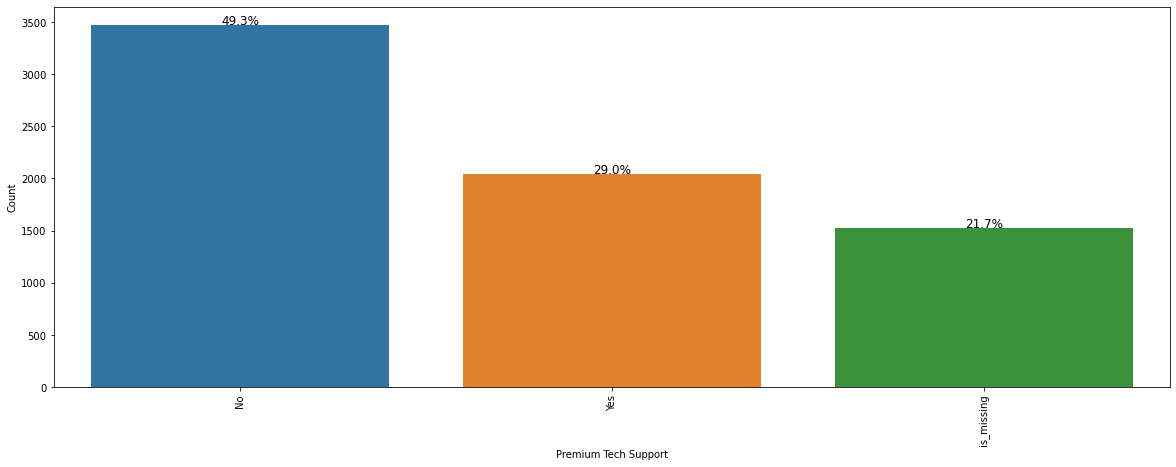

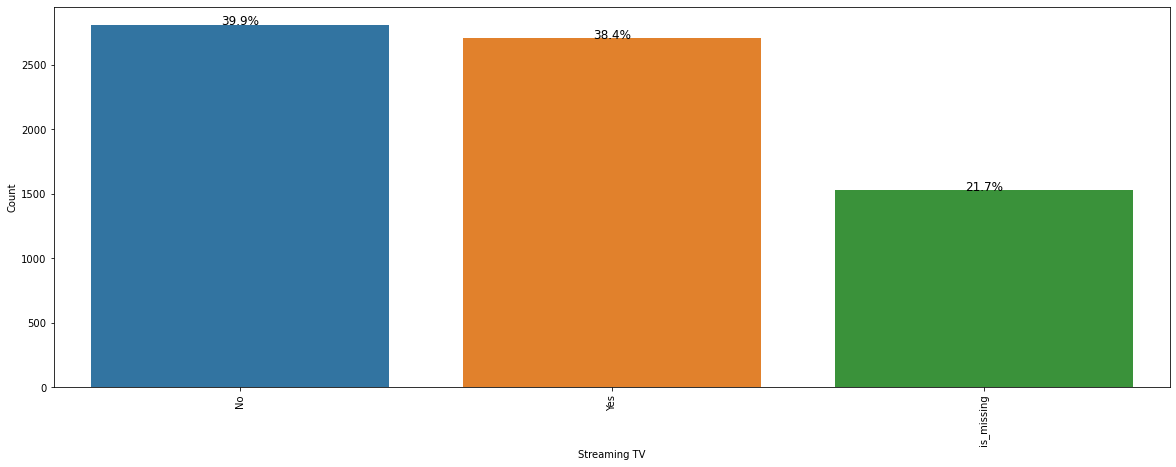

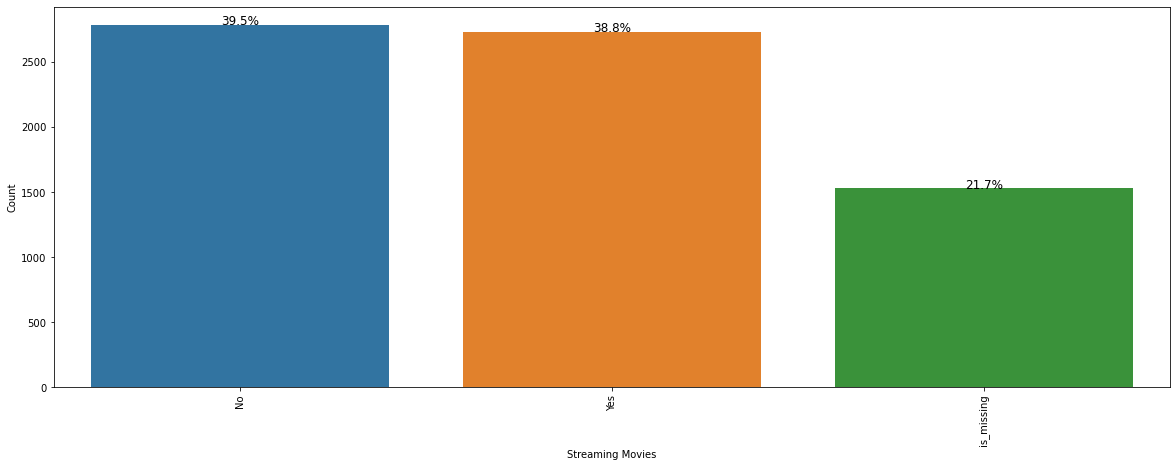

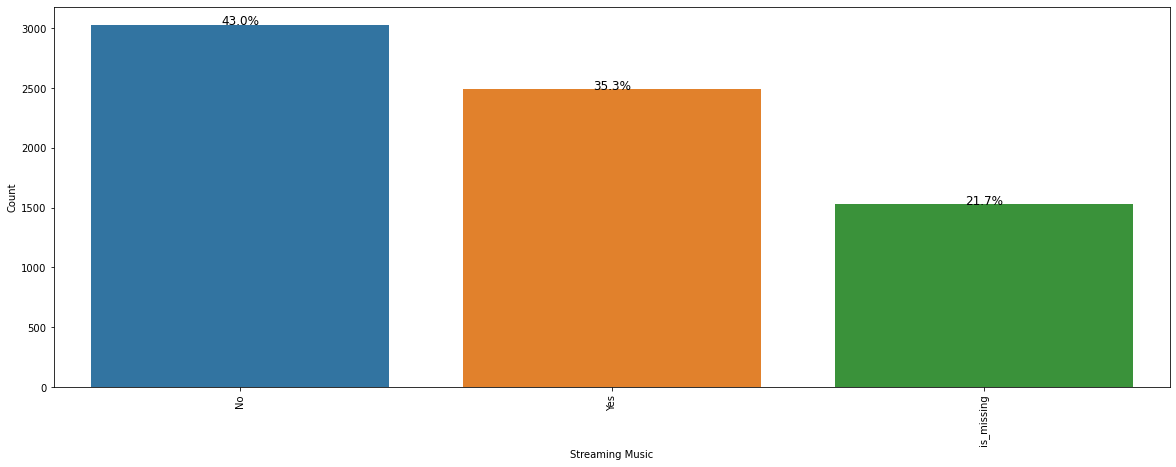

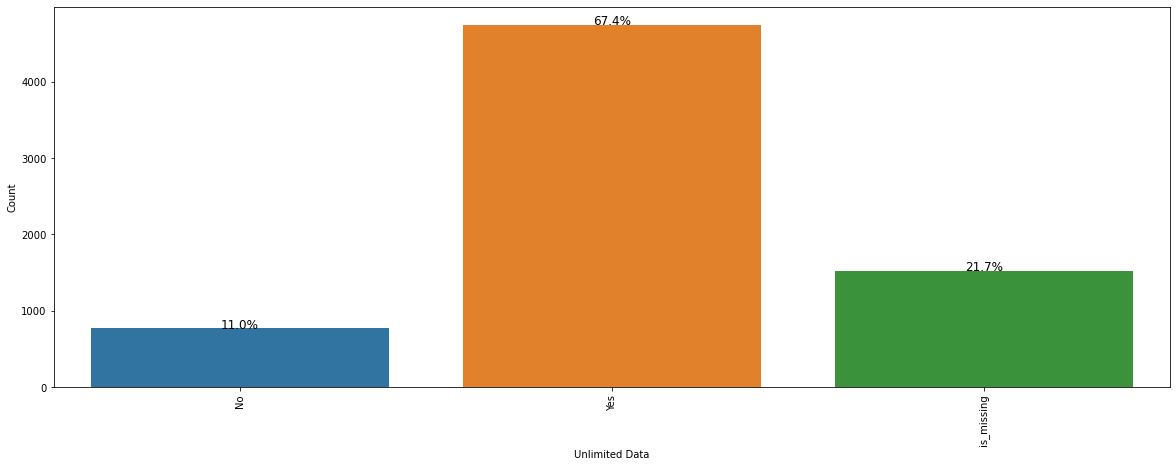

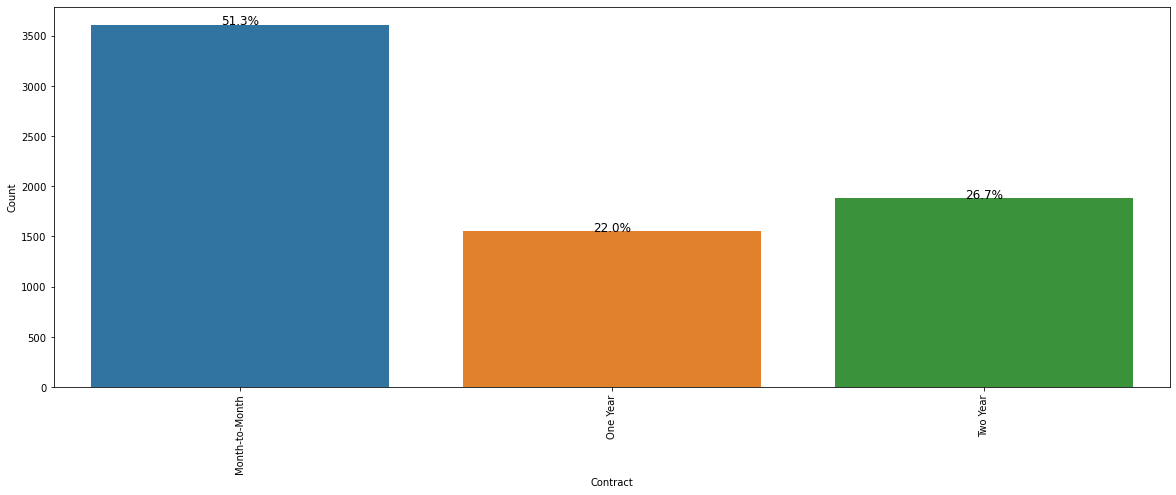

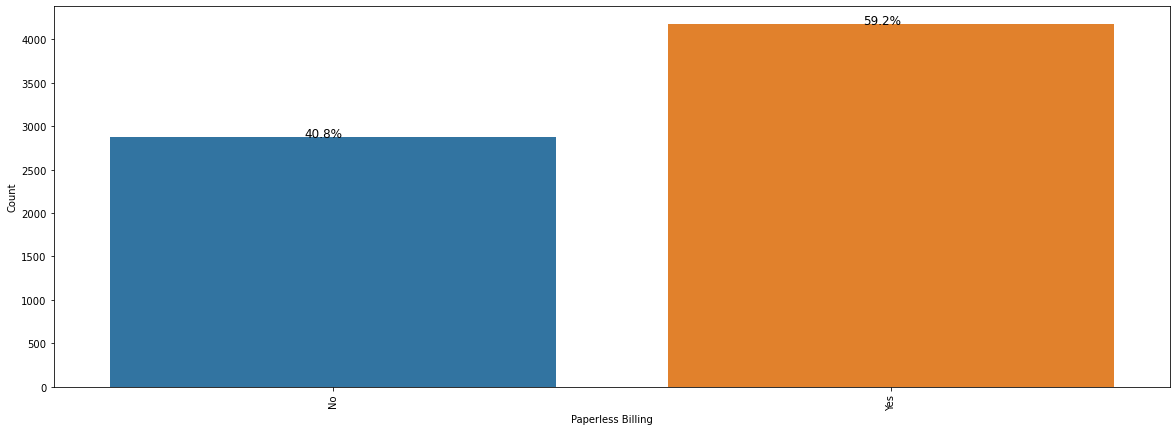

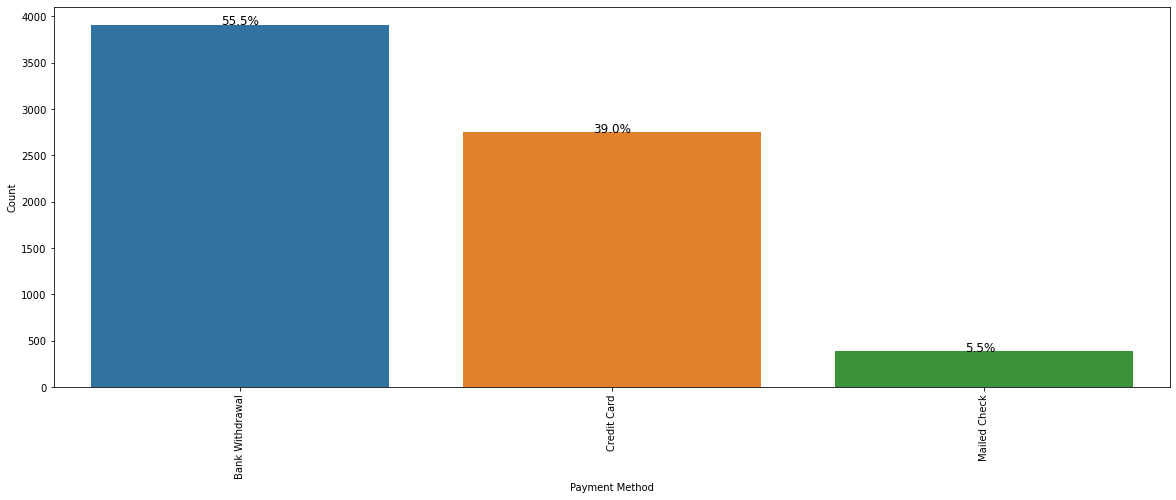

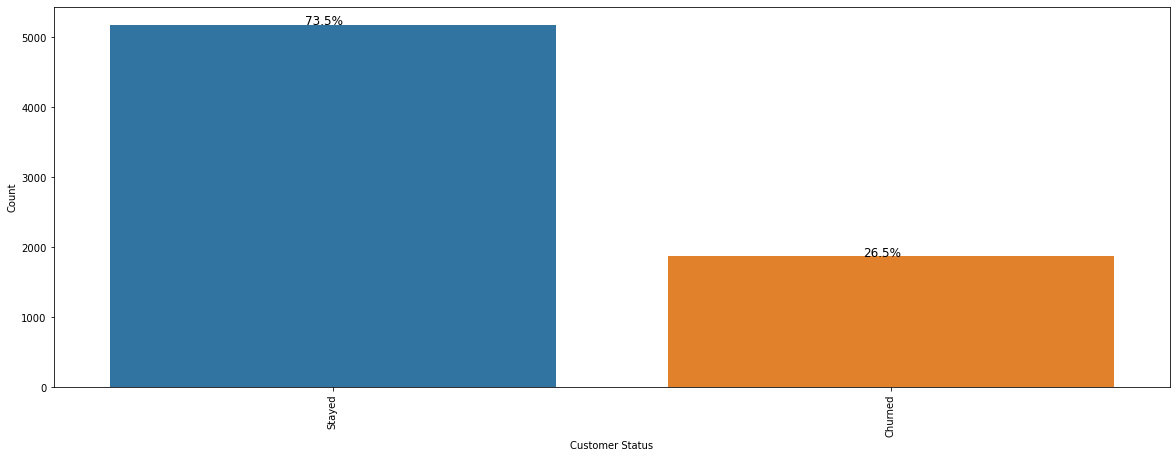

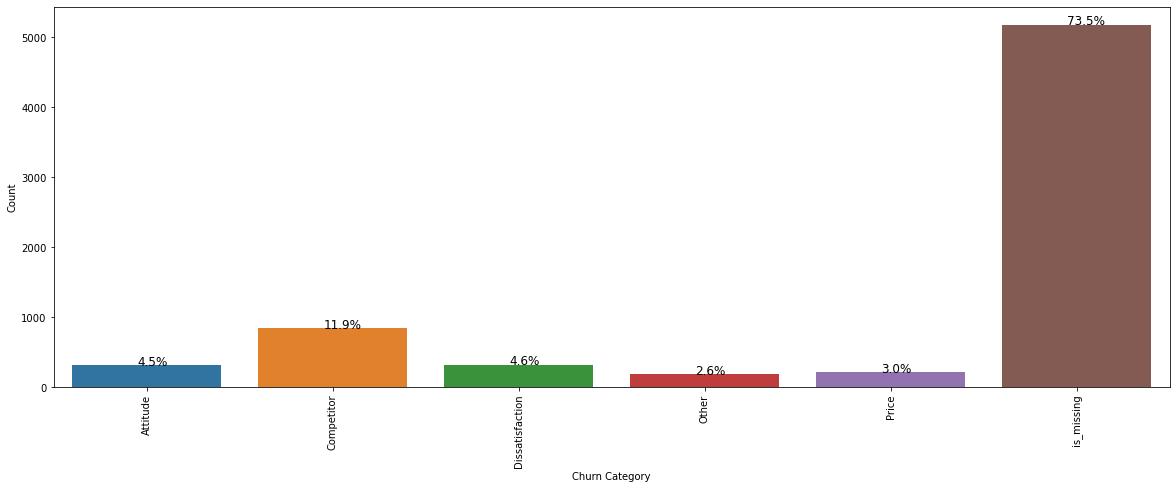

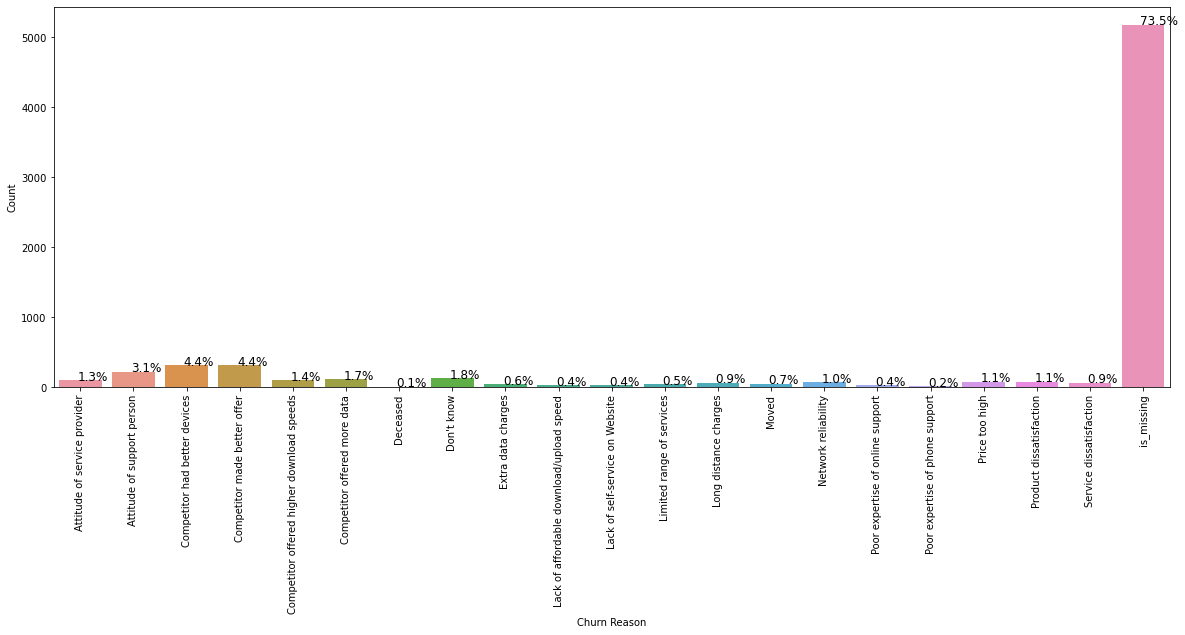

In [38]:
for i in cat_cols:
    plt.figure(figsize=(20,7))
    ax = sns.countplot(final_df[i]) #count plot for Name
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    bar_perc(ax,final_df[i])

In [39]:
final_df[num_cols].corr() #correlation of data

Age  Number of Dependents  Zip Code  \
Age                                1.000000             -0.119000 -0.008183   
Number of Dependents              -0.119000              1.000000  0.016493   
Zip Code                          -0.008183              0.016493  1.000000   
Number of Referrals               -0.025141              0.278003  0.001463   
Tenure in Months                   0.009927              0.108237  0.007146   
Avg Monthly Long Distance Charges -0.017226             -0.004270  0.010156   
Avg Monthly GB Download           -0.489489              0.219065 -0.005311   
Monthly Charge                     0.134511             -0.125649 -0.002517   
Total Charges                      0.059684              0.022535  0.001978   
Total Refunds                      0.024168              0.014023 -0.003797   
Total Extra Data Charges           0.025036             -0.014436 -0.014550   
Total Long Distance Charges        0.003065              0.068966  0.005063   
Total Revenue                      0.048265              0.038038  0.002944   
Population                        -0.018881             -0.015486 -0.424067   

                                   Number of Referrals  Tenure in Months  \
Age                                          -0.025141          0.009927   
Number of Dependents                          0.278003          0.108237   
Zip Code                                      0.001463          0.007146   
Number of Referrals                           1.000000          0.326975   
Tenure in Months                              0.326975          1.000000   
Avg Monthly Long Distance Charges             0.003233          0.013236   
Avg Monthly GB Download                       0.062141          0.039857   
Monthly Charge                                0.026301          0.239065   
Total Charges                                 0.250378          0.826074   
Total Refunds                                 0.024756          0.059021   
Total Extra Data Charges                      0.000350          0.082266   
Total Long Distance Charges                   0.216190          0.674149   
Total Revenue                                 0.261853          0.853146   
Population                                   -0.007704         -0.012102   

                                   Avg Monthly Long Distance Charges  \
Age                                                        -0.017226   
Number of Dependents                                       -0.004270   
Zip Code                                                    0.010156   
Number of Referrals                                         0.003233   
Tenure in Months                                            0.013236   
Avg Monthly Long Distance Charges                           1.000000   
Avg Monthly GB Download                                     0.011406   
Monthly Charge                                              0.054535   
Total Charges                                               0.033881   
Total Refunds                                              -0.023587   
Total Extra Data Charges                                    0.014835   
Total Long Distance Charges                                 0.563788   
Total Revenue                                               0.193591   
Population                                                 -0.024936   

                                   Avg Monthly GB Download  Monthly Charge  \
Age                                              -0.489489        0.134511   
Number of Dependents                              0.219065       -0.125649   
Zip Code                                         -0.005311       -0.002517   
Number of Referrals                               0.062141        0.026301   
Tenure in Months                                  0.039857        0.239065   
Avg Monthly Long Distance Charges                 0.011406        0.054535   
Avg Monthly GB Download                           1.000000        0.110338   
Monthly 

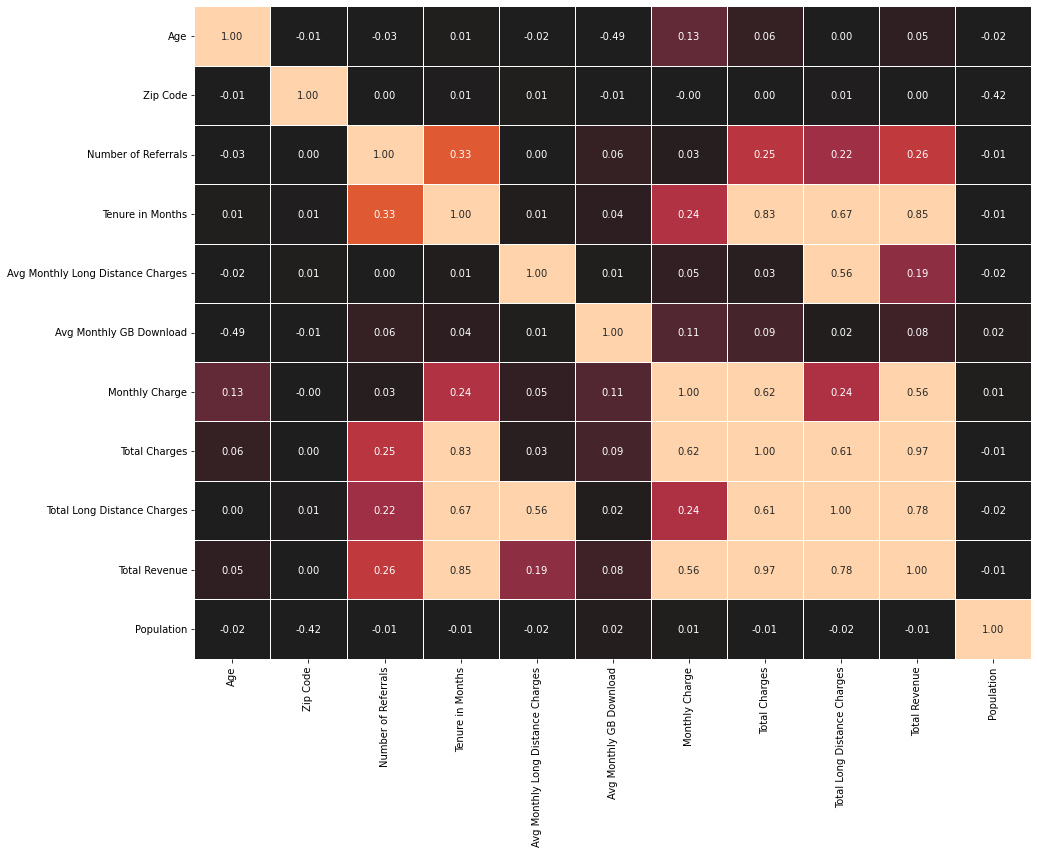

In [40]:
plt.figure(figsize=(15,12))
corr_cols = ['Age', 'Zip Code', 'Number of Referrals', 'Tenure in Months', 
             'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
            'Monthly Charge', 'Total Charges', 'Total Long Distance Charges', 
             'Total Revenue', 'Population']
sns.heatmap(final_df[corr_cols].corr(), annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            vmin=0, vmax=0.5,
            fmt='0.2f')  # heatmap
plt.show()

<Figure size 1440x1440 with 0 Axes>

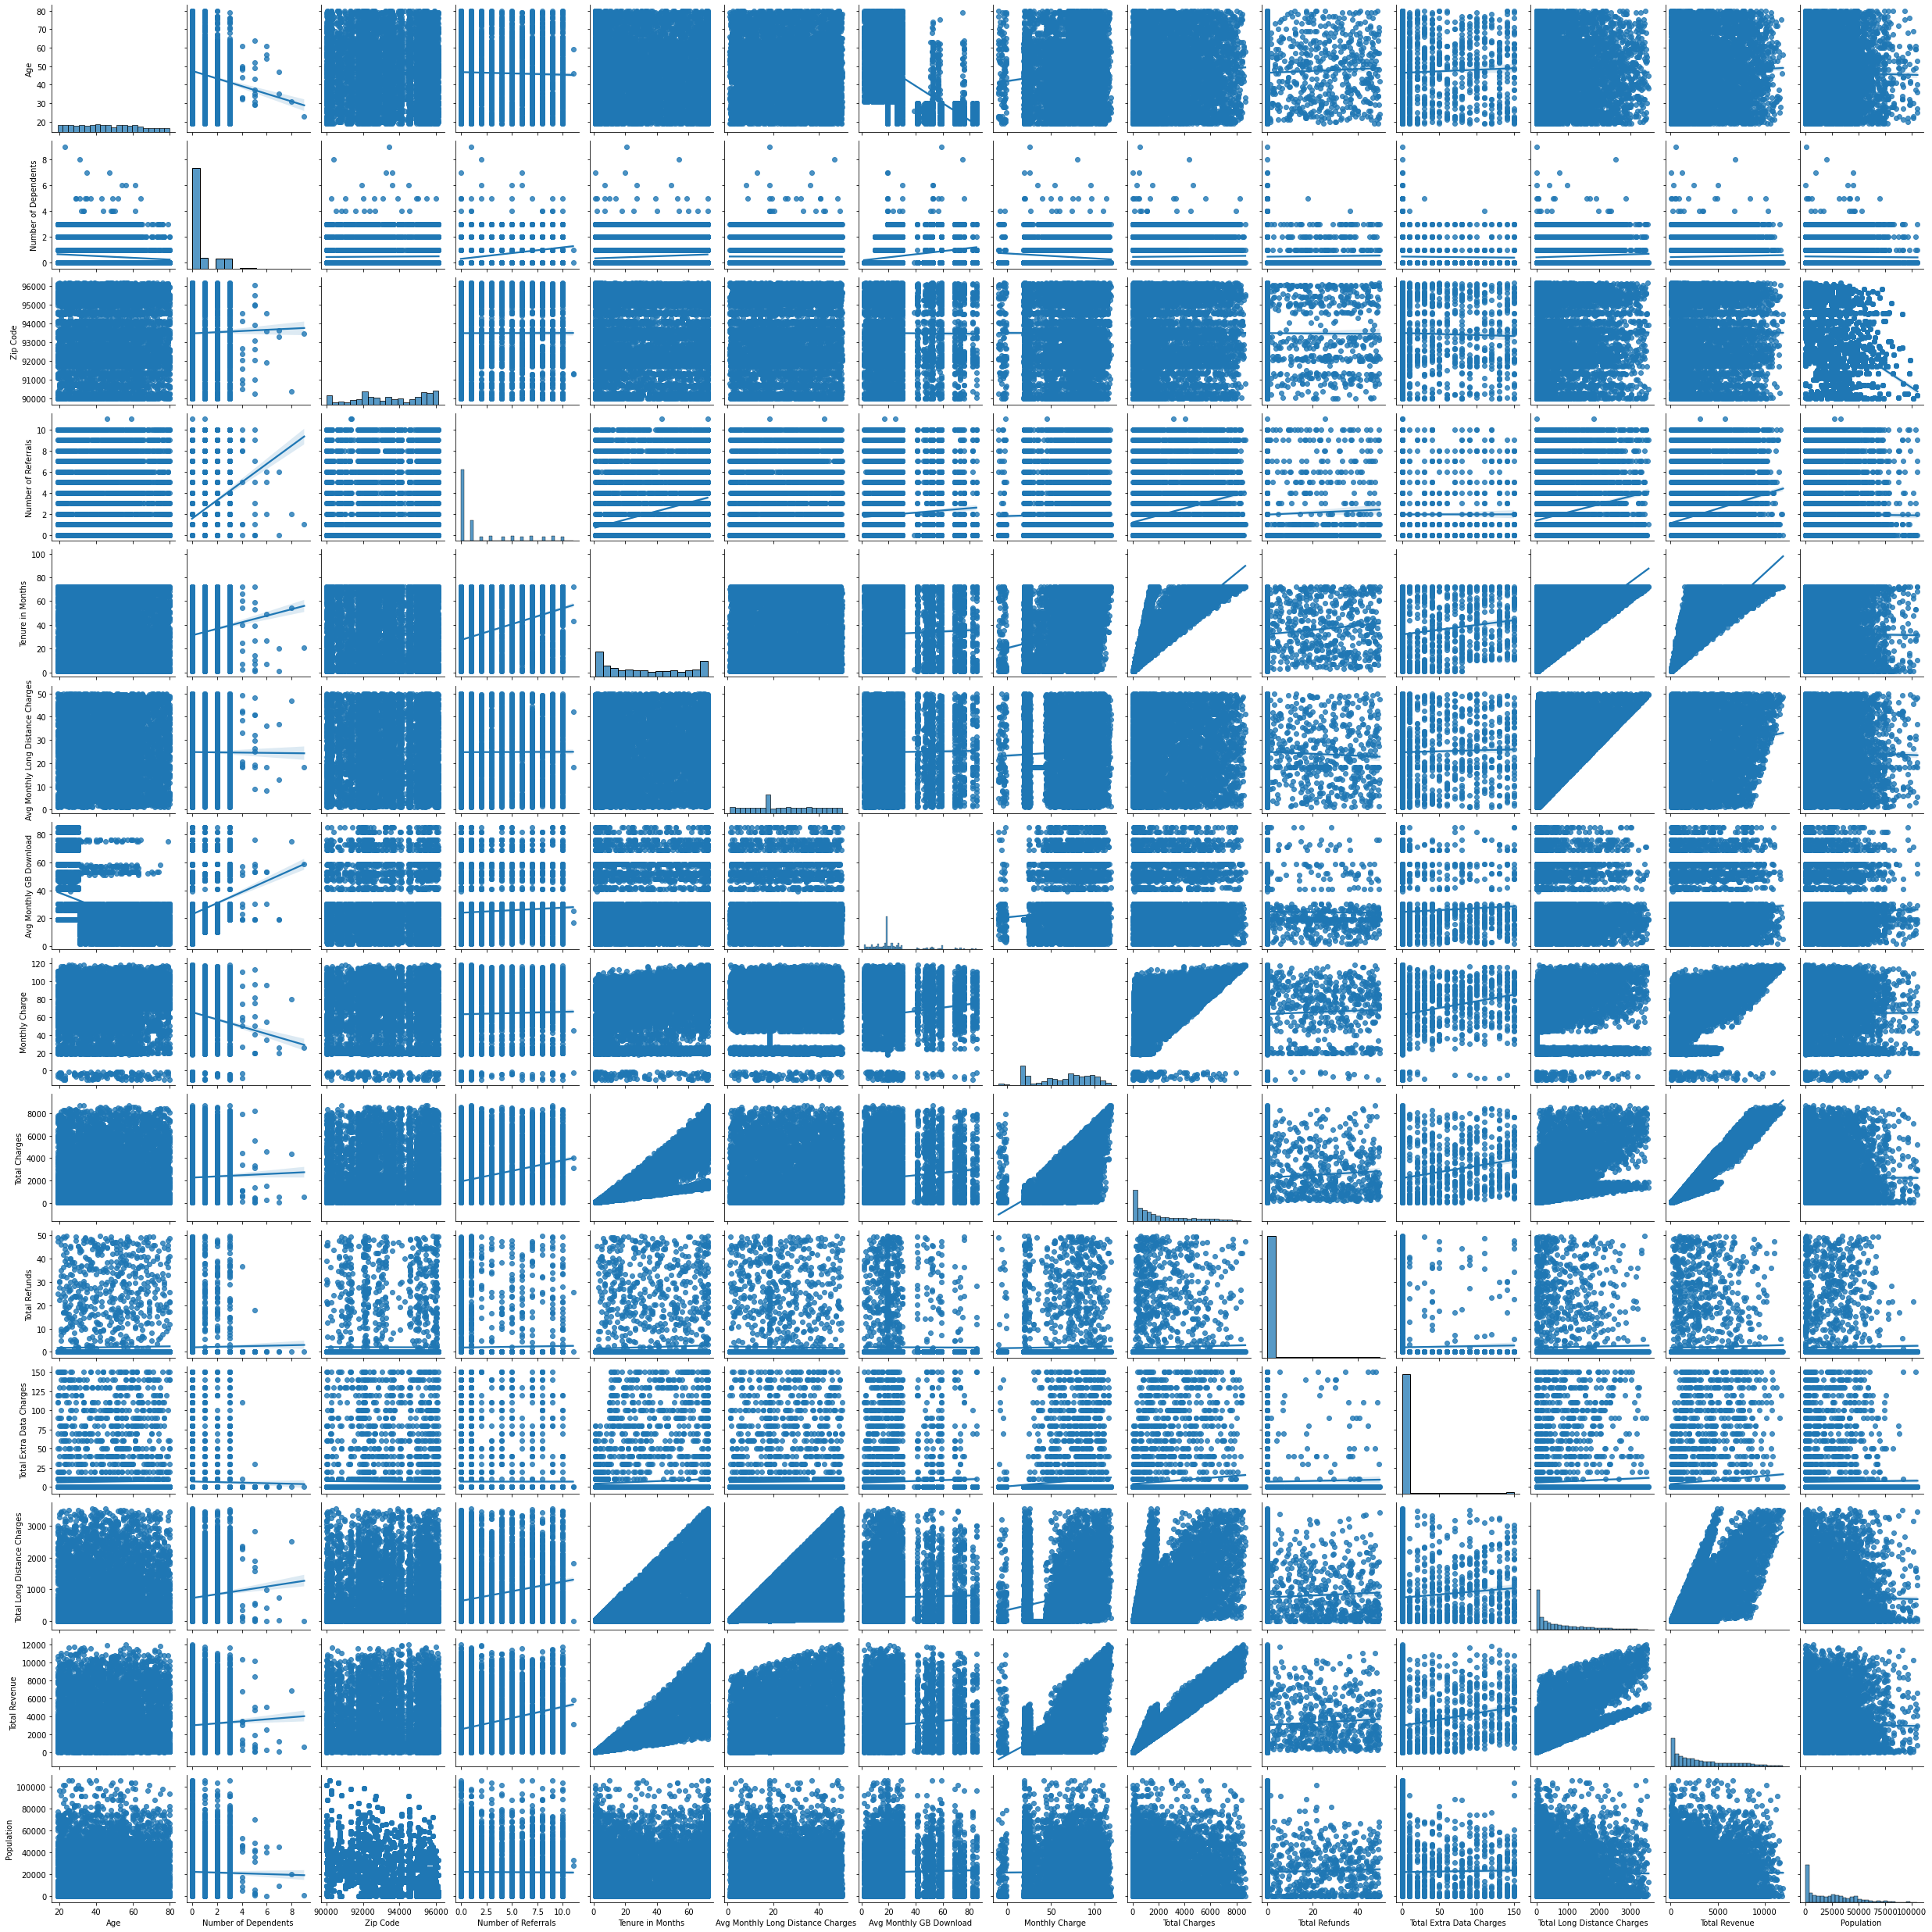

In [41]:
plt.figure(figsize = (20,20))
sns.pairplot(data = final_df, kind = 'reg') #pairplot
plt.show()

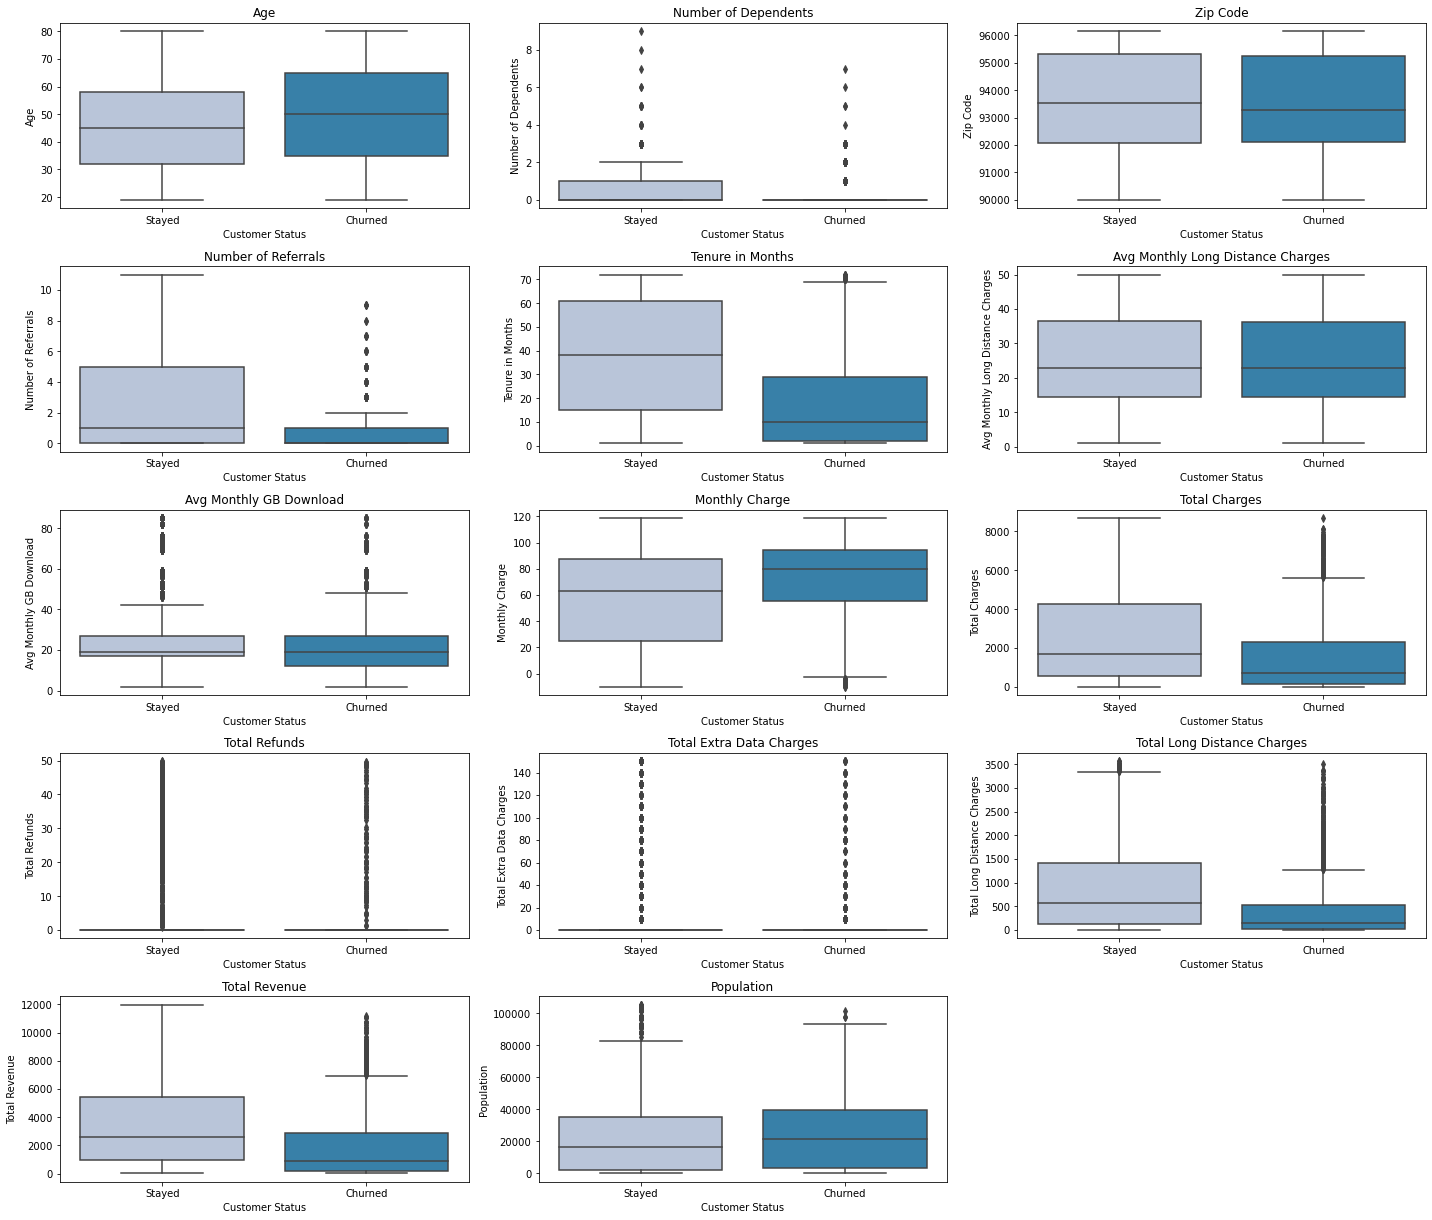

In [80]:
plt.figure(figsize=(20,20))
for i, variable in enumerate(final_df[num_cols]):
                     plt.subplot(6,3,i+1)
                     sns.boxplot(final_df['Customer Status'], final_df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

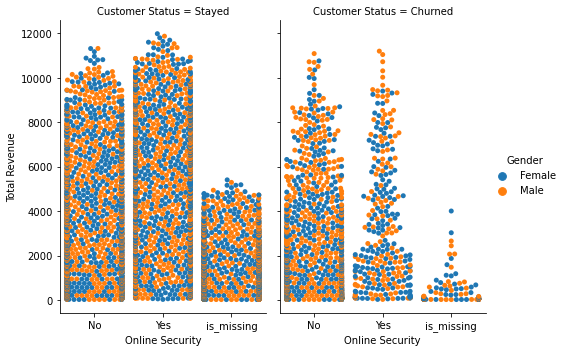

In [55]:
sns.catplot(
    data=final_df, x="Online Security", y="Total Revenue", hue="Gender",
    kind="swarm", col="Customer Status", aspect=.7,
)

In [52]:
print(num_cols)

Index(['Age', 'Number of Dependents', 'Zip Code', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Population'],
      dtype='object')


In [68]:
cat_cols_ex_city = cat_cols[:2].tolist()
cat_cols_ex_city.extend(cat_cols[2+1:])


In [69]:
print(cat_cols_ex_city)

['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason']


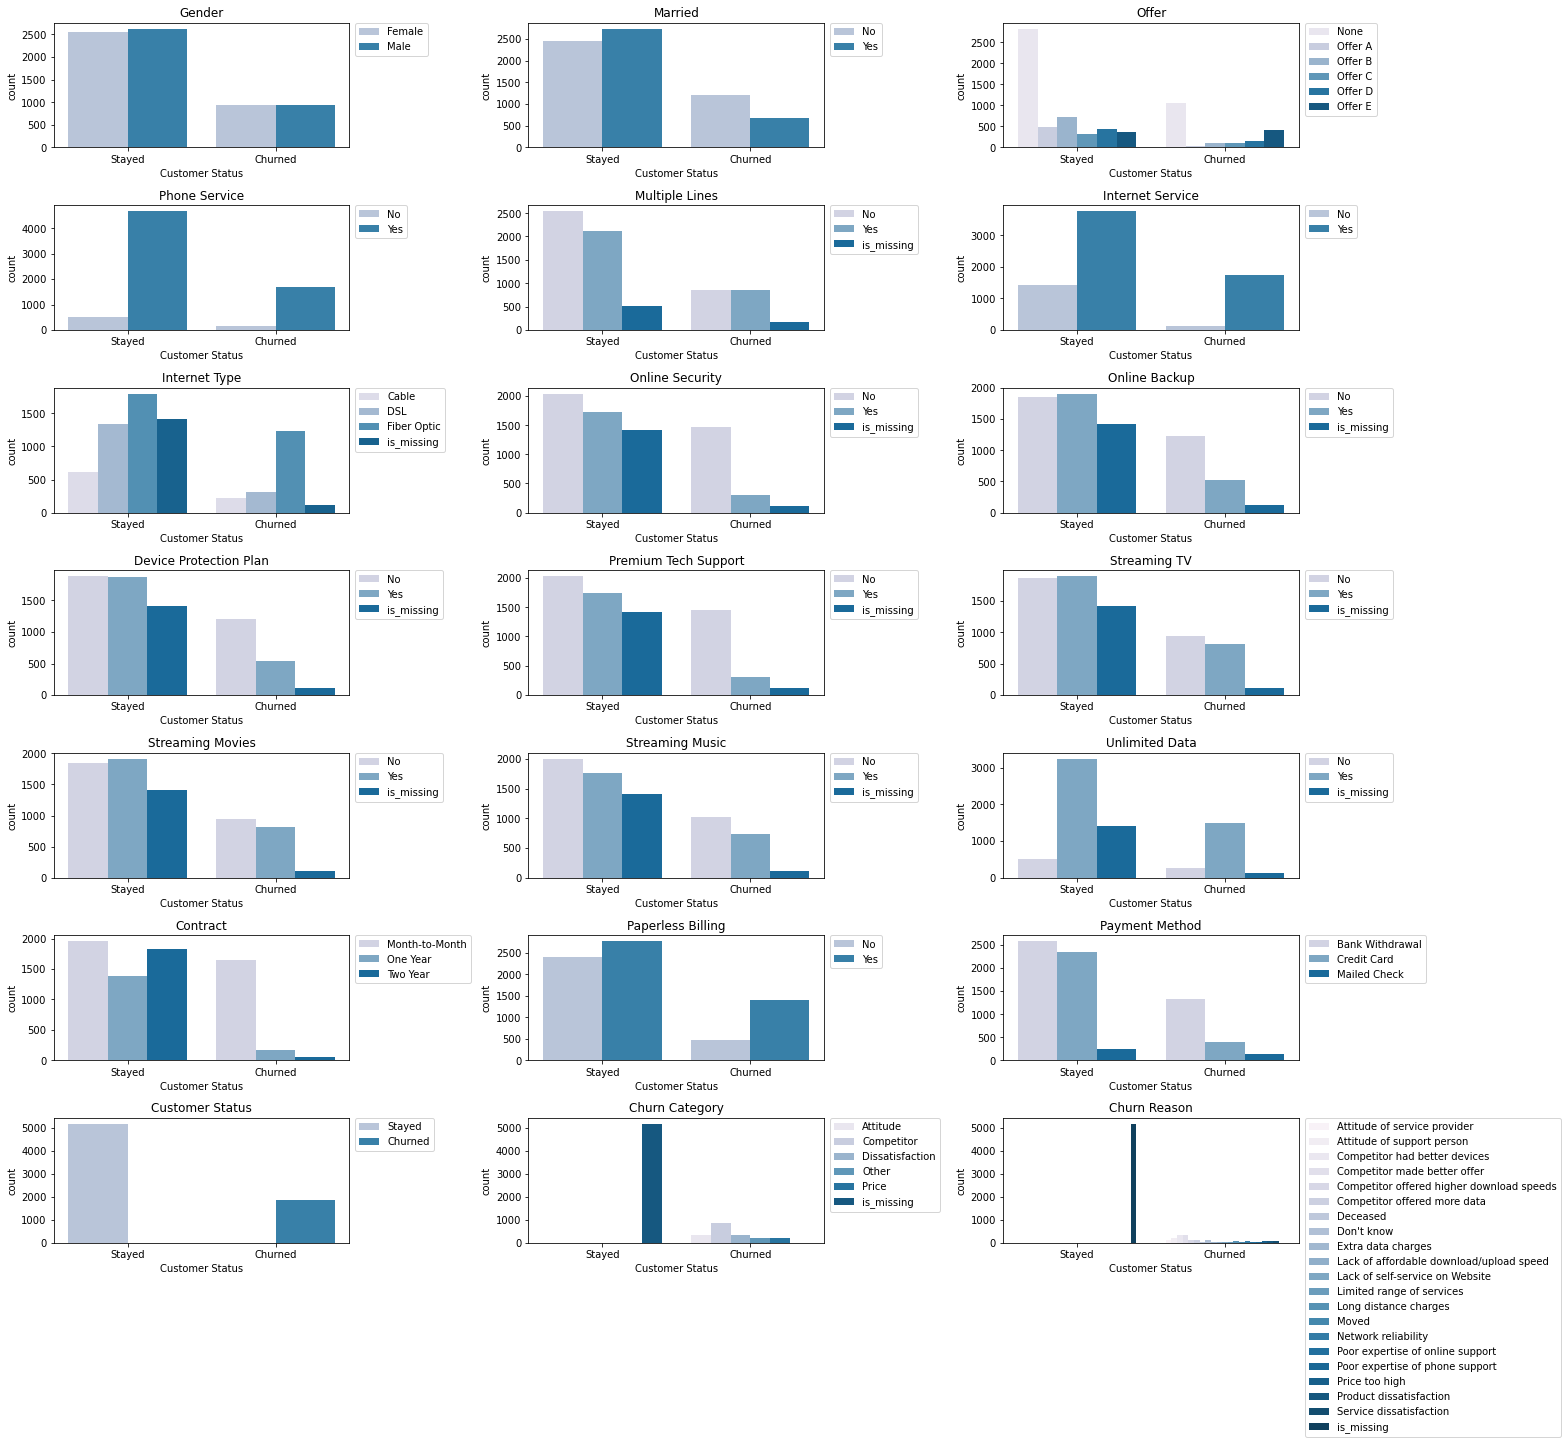

In [78]:
plt.figure(figsize=(20,20))
for i, variable in enumerate(final_df[cat_cols_ex_city]):
                     plt.subplot(8,3,i+1)
                     sns.countplot(data=final_df, x='Customer Status', hue=final_df[variable],palette="PuBu")
                     plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

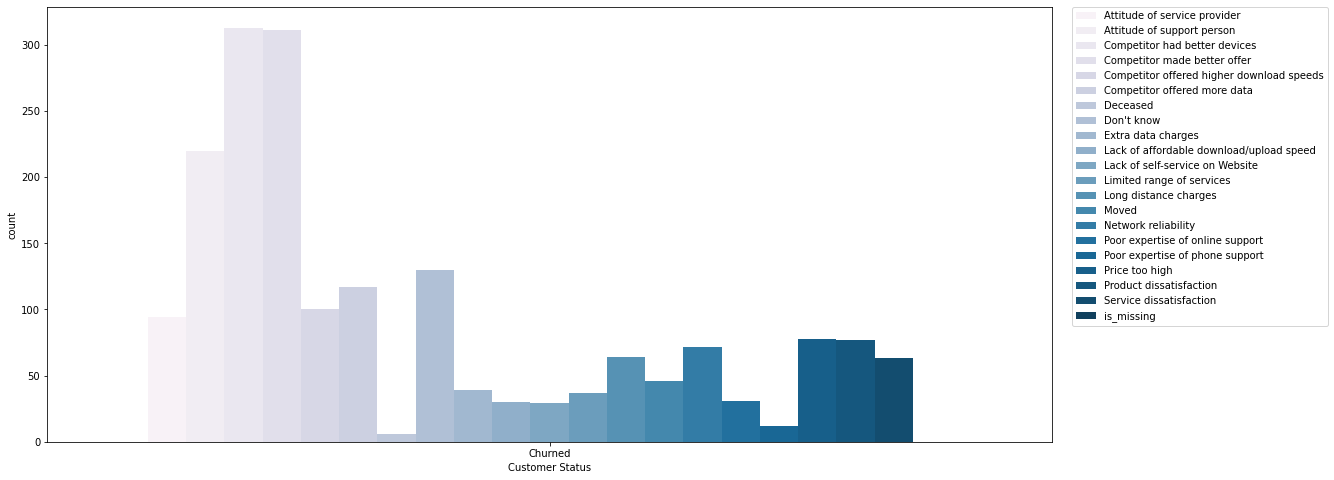

In [77]:
fig, ax = plt.subplots(figsize=(18,8))
sns.countplot(data=final_df[final_df['Customer Status']=='Churned'], x='Customer Status', hue='Churn Reason', ax=ax,palette="PuBu")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


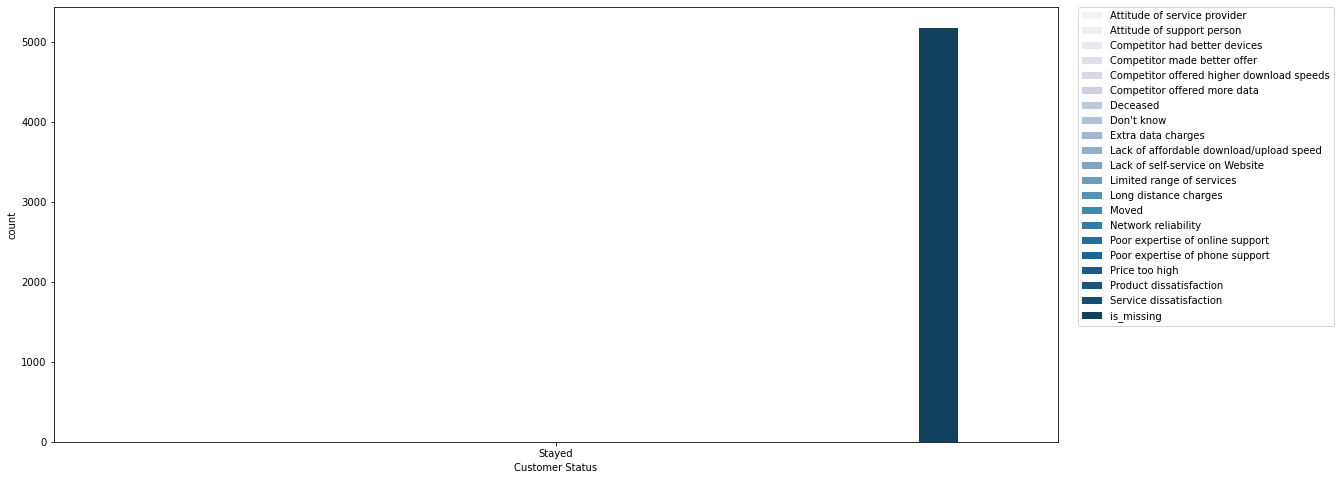

In [81]:
fig, ax = plt.subplots(figsize=(18,8))
sns.countplot(data=final_df[final_df['Customer Status']=='Stayed'], x='Customer Status', hue='Churn Reason', ax=ax,palette="PuBu")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)